In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.7 MB/s eta 0:00:00


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import Descriptors
from rdkit.Chem import Descriptors3D
from rdkit.Chem import rdMolDescriptors
import seaborn as sns
from catboost import CatBoostRegressor
import math
from joblib import dump, load

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
import math

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Информация о связывании медицинского радионуклида различными молекулами.csv')

In [ ]:
df['mol'] = df['smiles'].apply(lambda x: Chem.AddHs(Chem.MolFromSmiles(x)))
df['num_of_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms())
df['num_of_heavy_atoms'] = df['mol'].apply(lambda x: x.GetNumHeavyAtoms())
df['tpsa'] = df['mol'].apply(lambda x: Descriptors.TPSA(x))
df['mol_w'] = df['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
df['num_valence_electrons'] = df['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x))
df['num_heteroatoms'] = df['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))
df['num_rings'] = df['mol'].apply(lambda x: Descriptors.RingCount(x))
df['Fp_Density_Morgan1'] = df['mol'].apply(lambda x: Descriptors.FpDensityMorgan1(x))
df['HeavyAtomMolWt'] = df['mol'].apply(lambda x: Descriptors.HeavyAtomMolWt(x))

In [ ]:
def number_of_atoms(atom_list, df):
    for i in atom_list:
        df['num_of_{}_atoms'.format(i)] = df['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

symbols = ["C", "O", "N"]
number_of_atoms(symbols, df)

<ipython-input-14-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

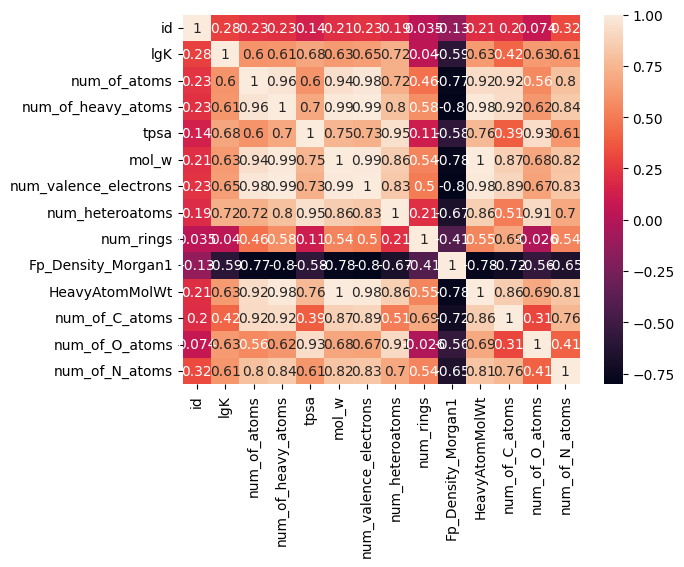

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df_ml = df.drop(columns=['id', 'smiles', 'mol'])

In [ ]:
X = df_ml.drop(columns=['lgK'])
y = df_ml['lgK']

In [ ]:
def evaluation(model, X_test, y_test):
    prediction = model.predict(X_test)
    mse = math.sqrt(mean_squared_error(y_test, prediction))
    return round(mse,5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
cb = CatBoostRegressor(depth=None, iterations=500, learning_rate=0.05, grow_policy='Lossguide',
                        min_data_in_leaf=None, loss_function='RMSE', verbose=False)
cb.fit(X, y)

In [ ]:
dump(cb, 'cb.joblib')

['cb.joblib']

In [ ]:
rf = RandomForestRegressor(n_estimators=400, max_depth=None, max_features='log2', n_jobs=-1)
rf.fit(X, y)

RandomForestRegressor(max_features='log2', n_estimators=400, n_jobs=-1)

In [ ]:
evaluation(rf, X_test, y_test)

1.4454

In [ ]:
dump(rf, 'rf.joblib')

['rf.joblib']

In [ ]:
lr = Ridge(alpha=0.7, max_iter=1000, solver='saga')
lr.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge(alpha=0.7, max_iter=1000, solver='saga')

In [ ]:
evaluation(lr, X_test, y_test)

4.20427

In [ ]:
dump(lr, 'lr.joblib')

['lr.joblib']

In [ ]:
model = load(cb, '/content/drive/MyDrive/model.joblib')

['model.joblib']